## Classifying if the email is Ham or spam 

In [1]:
# importing required libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# importing the Dataset
messages = pd.read_csv('sms+spam+collection/SMSSpamCollection', sep='\t', names=["label", "message"])
    
# messages = pd.read_excel('gener_ham_spam.xlsx')


In [3]:
messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
messages["length"] = messages["message"].apply(len) # counts the length of the messages
messages.sort_values(by='length', ascending=False).head(10) # sorting the table based on the length of message on decending order

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2849,ham,Sad story of a Man - Last week was my b'day. M...,588
2380,ham,"Good evening Sir, hope you are having a nice d...",482
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1513,ham,"Hey sweet, I was wondering when you had a mome...",458
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...,446


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000215C51DEC48>,
      dtype=object)

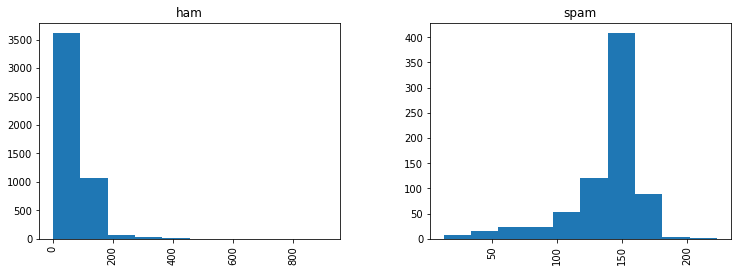

In [7]:
messages.hist(column = 'length', by ='label',figsize=(12,4), bins = 10)

In [8]:
#Data cleaning and preprocessing
nltk.download('stopwords') 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\achal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()       
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
# Creating the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [11]:
y=pd.get_dummies(messages['label'])

y=y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [13]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)
print(y_pred)




[0 1 0 ... 0 1 0]


In [129]:
# clf = SVC(kernel='linear').fit(X_train, y_train)

# predictions = clf.predict(X_test)
# print('predicted', predictions)

In [14]:
# performanance

print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       955
           1       0.91      0.95      0.93       160

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
print(confusion_matrix(y_test,y_pred))

[[940  15]
 [  8 152]]
